In [ ]:
ТЗ - мини kaggle: deep leraning без машинки.
первое место 50рублей (обожаю этого манъяка)
ну и за что мне только второе и 30? я жи няшка.

ладно. едем. кластеризация и классификация ручками.
задача - лучший бизнесовый анализ, вывод в циферках.

In [1]:
import pandas as pd

In [14]:
import warnings
warnings.simplefilter('ignore')
%pylab inline                 
from pylab import rcParams    
rcParams['figure.figsize'] = 25, 18
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('C:/Users/Battlestation/Downloads/New_Query_2018_08_02.csv', sep=',')
df.head()

,user_id,page,happened_at,activity_number,time_lag
0,57529,rooms.homework-showcase,2017-03-01T00:00:07.710000,1,NaN
1,57529,rooms.view.step.content,2017-03-01T00:00:10.275000,2,3.0
2,57529,rooms.view.step.content,2017-03-01T00:00:10.436000,2,0.0
3,168671,rooms.view.step.content,2017-03-01T00:00:12.035000,2,NaN
4,168671,rooms.view.step.content,2017-03-01T00:00:50.632000,2,38.0


In [4]:
# Технический хаарктер данных.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55077 entries, 0 to 55076
Data columns (total 5 columns):
user_id            55077 non-null int64
page               55077 non-null object
happened_at        55077 non-null object
activity_number    55077 non-null int64
time_lag           51955 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ MB


In [5]:
# Преобразуем секунды в минуты и создадим новый признак time_lag_min
df['time_lag_min'] = df['time_lag'] / 60
df.head()

,user_id,page,happened_at,activity_number,time_lag,time_lag_min
0,57529,rooms.homework-showcase,2017-03-01T00:00:07.710000,1,NaN,NaN
1,57529,rooms.view.step.content,2017-03-01T00:00:10.275000,2,3.0,0.050000
2,57529,rooms.view.step.content,2017-03-01T00:00:10.436000,2,0.0,0.000000
3,168671,rooms.view.step.content,2017-03-01T00:00:12.035000,2,NaN,NaN
4,168671,rooms.view.step.content,2017-03-01T00:00:50.632000,2,38.0,0.633333


In [6]:
# Посмотрим на характер распределения признака time_lag_min
df['time_lag_min'].describe()

count    51955.000000
mean         8.747069
std         46.751926
min          0.000000
25%          0.100000
50%          0.666667
75%          4.500000
max       1205.550000
Name: time_lag_min, dtype: float64

In [7]:
# Выборка по медиане в 46 минут.
df_46 = df.loc[df['time_lag_min'] <=46]
df_46.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50606 entries, 1 to 55076
Data columns (total 6 columns):
user_id            50606 non-null int64
page               50606 non-null object
happened_at        50606 non-null object
activity_number    50606 non-null int64
time_lag           50606 non-null float64
time_lag_min       50606 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.7+ MB


In [8]:
# Выборка по ТЗ - сессия <= одному часу
df_60 = df.loc[df['time_lag_min'] <=60]
df_60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50830 entries, 1 to 55076
Data columns (total 6 columns):
user_id            50830 non-null int64
page               50830 non-null object
happened_at        50830 non-null object
activity_number    50830 non-null int64
time_lag           50830 non-null float64
time_lag_min       50830 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.7+ MB


In [9]:
# Проведём разметку данных исходя из распределения в рамках методики оценки успешности\неуспешности учебного процеccа.
# Поскольку учебный процесс можно считать успешным при длинне сессии в 46 минут, установим правила.

# Правило 1: 0 или 1 минута активности ученика == мусорная активность.
# Правило 2: 1 - 16 минут активности ученика == минимальная активность.
# Правило 3: 15 - 31 минут активности ученика == средняя активность.
# Правило 4: 31 - 46 минут активность ученика == оптимальная активность.
# Правило 5: 46 - 60 минут активность ученика == отстающий ученик.
# Правило 6: 60 - 1205 минут активность ученика == двоечник.

# Проведём переразметку данных в основной выборке.

df["time__lag_0_1"] = ((df.time_lag >0) & (df.time_lag <=1)).astype('int')
df["time__lag_1_16"] = ((df.time_lag >1) & (df.time_lag <=16)).astype('int')
df["time__lag_16_31"] = ((df.time_lag >16) & (df.time_lag <=31)).astype('int')
df["time__lag_31_46"] = ((df.time_lag >31) & (df.time_lag <=46)).astype('int')
df["time__lag_46_60"] = ((df.time_lag >46) & (df.time_lag <=60)).astype('int')
df["time__lag_std"] = ((df.time_lag >1) & (df.time_lag <=46)).astype('int')
df["time__lag_max"] = ((df.time_lag >60) & (df.time_lag <=1205)).astype('int')
df.head()

,user_id,page,happened_at,activity_number,time_lag,time_lag_min,time__lag_0_1,time__lag_1_16,time__lag_16_31,time__lag_31_46,time__lag_46_60,time__lag_std,time__lag_max
0,57529,rooms.homework-showcase,2017-03-01T00:00:07.710000,1,NaN,NaN,0,0,0,0,0,0,0
1,57529,rooms.view.step.content,2017-03-01T00:00:10.275000,2,3.0,0.050000,0,1,0,0,0,1,0
2,57529,rooms.view.step.content,2017-03-01T00:00:10.436000,2,0.0,0.000000,0,0,0,0,0,0,0
3,168671,rooms.view.step.content,2017-03-01T00:00:12.035000,2,NaN,NaN,0,0,0,0,0,0,0
4,168671,rooms.view.step.content,2017-03-01T00:00:50.632000,2,38.0,0.633333,0,0,0,1,0,1,0


In [10]:
# Немного общей статистики из расчёта уникальных параметров (намекаю, в общей выборке 3122 уникальных юзера)

for c in df.columns:
    n = df[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

user_id
3122
----------
page
3 [('rooms.homework-showcase', 6443), ('rooms.lesson.rev.step.content', 17785), ('rooms.view.step.content', 30849)]
----------
happened_at
55030
----------
activity_number
3 [(1, 6443), (2, 30849), (3, 17785)]
----------
time_lag
3271
----------
time_lag_min
3271
----------
time__lag_0_1
2 [(0, 52803), (1, 2274)]
----------
time__lag_1_16
2 [(0, 38771), (1, 16306)]
----------
time__lag_16_31
2 [(0, 51557), (1, 3520)]
----------
time__lag_31_46
2 [(0, 53001), (1, 2076)]
----------
time__lag_46_60
2 [(0, 53790), (1, 1287)]
----------
time__lag_std
2 [(0, 33175), (1, 21902)]
----------
time__lag_max
2 [(0, 33858), (1, 21219)]
----------


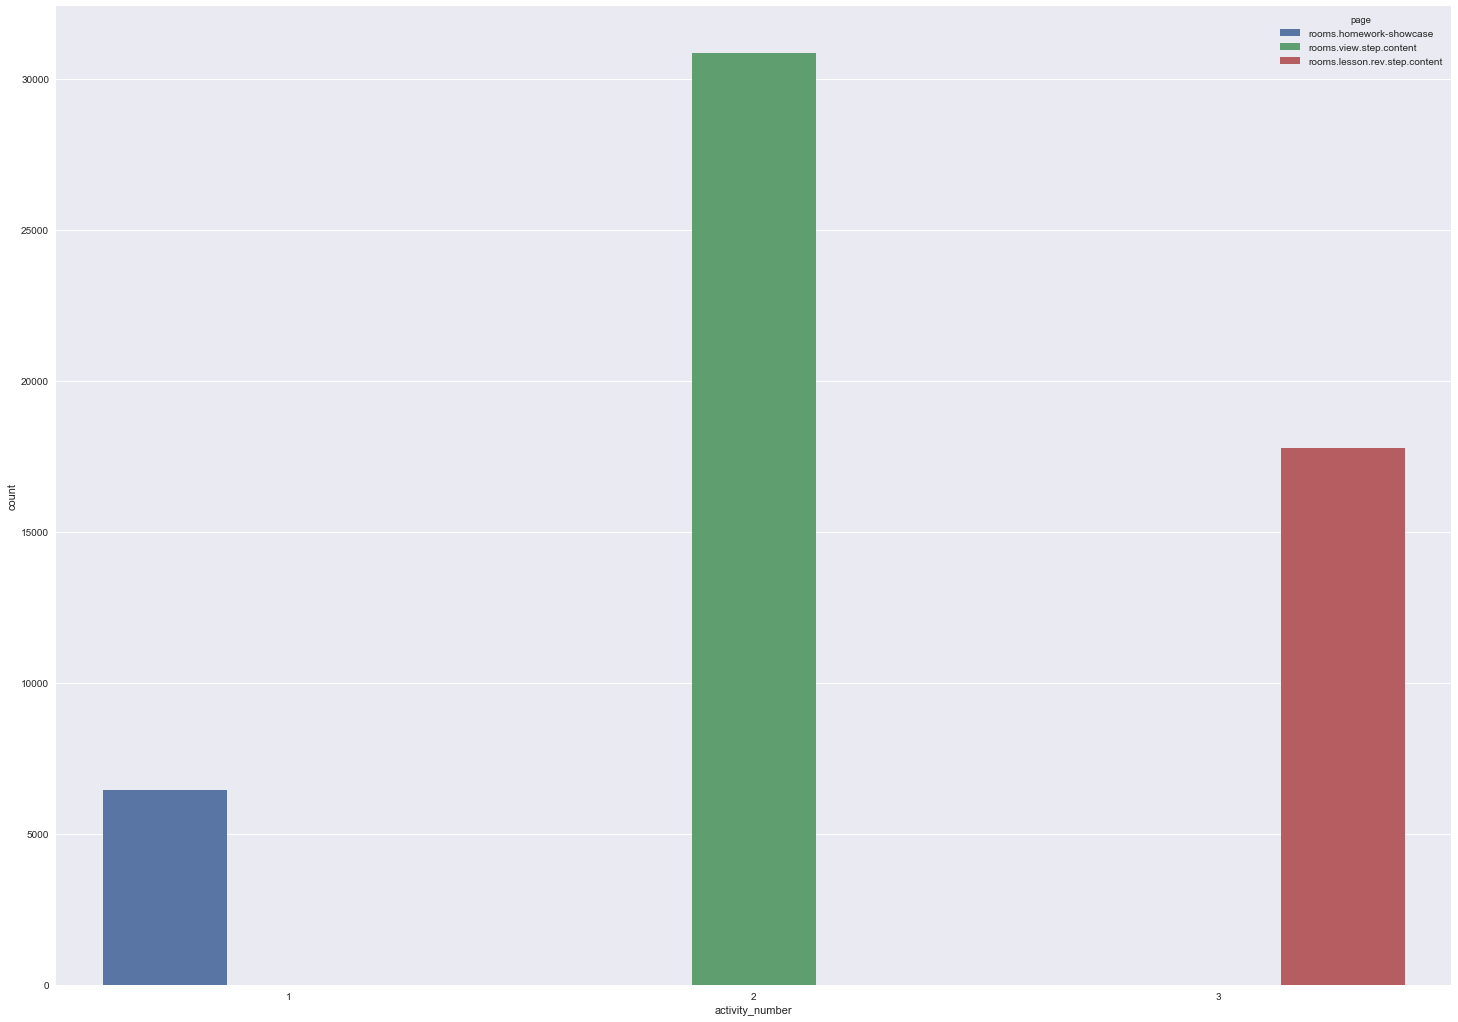

In [15]:
# Оценка принадлежности признака activity_number
# Здесь и далее - почти все графики кликабельны 
# Как видно чаще всего сидя на странице домашки.

sns.countplot(x='activity_number', hue='page', data=df);

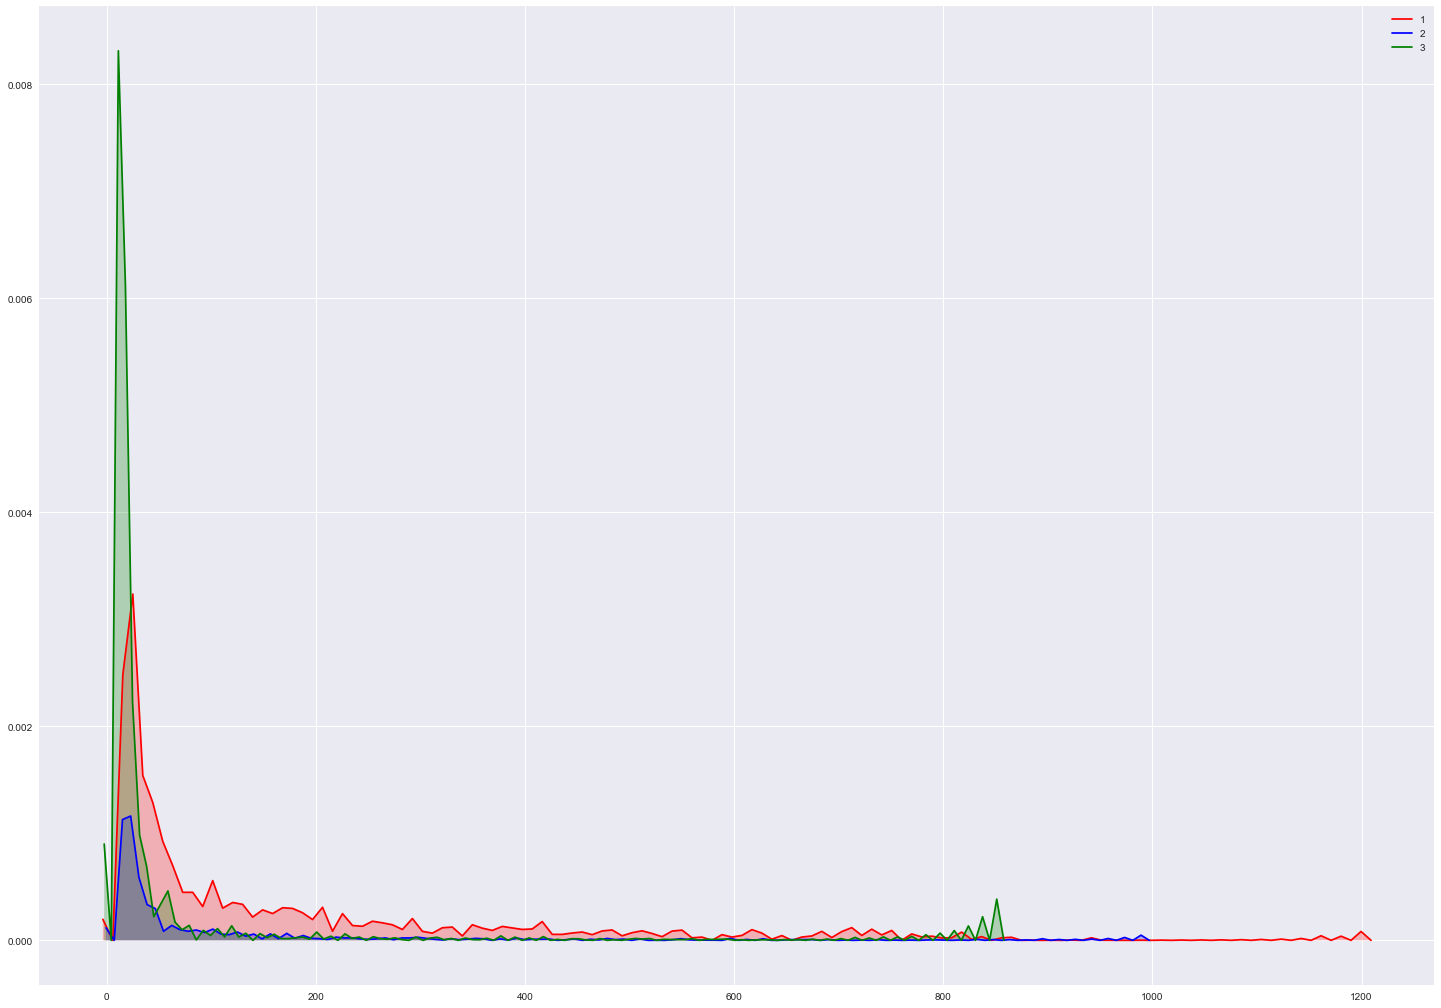

In [16]:
# Распределения времени активности учеников в общей выборке по типу активности( 1.2.3)
sns.kdeplot(df['time_lag_min'][df.activity_number==1], shade=True, color="r", label='1')
sns.kdeplot(df['time_lag_min'][df.activity_number==2], shade=True, color="b", label='2')
sns.kdeplot(df['time_lag_min'][df.activity_number==3], shade=True, color="g", label='3')

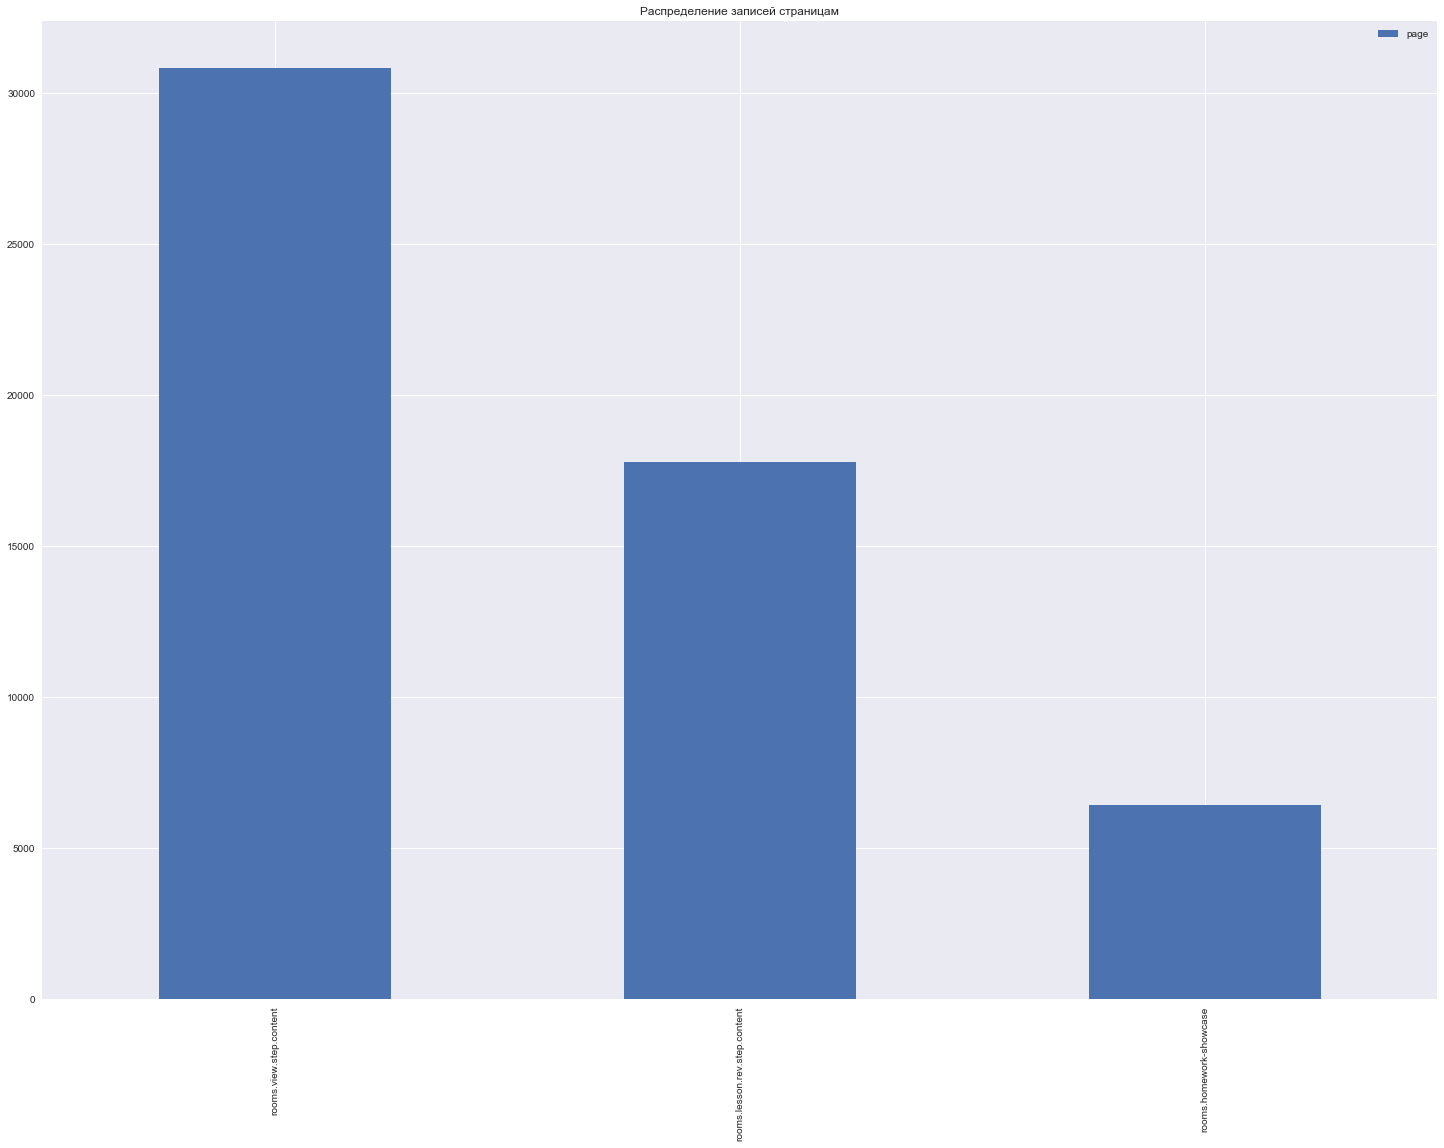

In [17]:
# Характер распределение записей в общей выборке по страницам:
# Больше всего записей на странице со списокм заданий.
# Возможно это потенциальный маркер на отсев.
df['page'].value_counts().plot(kind='bar', label='page')
plt.legend()
plt.title('Распределение записей страницам');

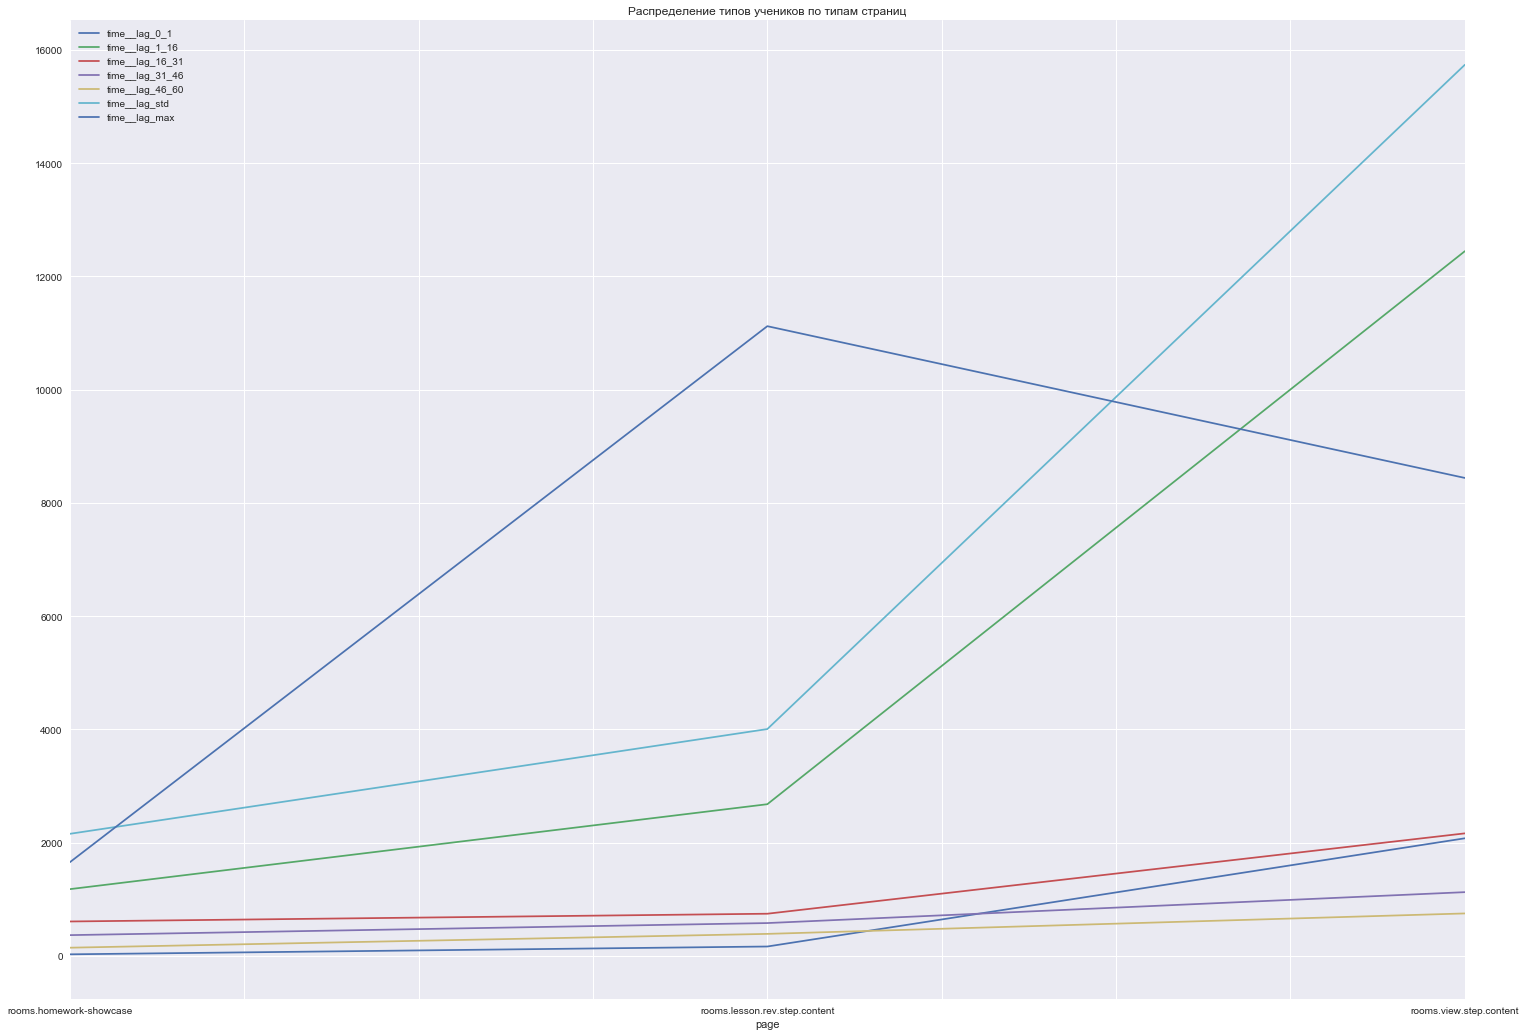

In [21]:
# Характер распределения типов учеников при проходам по страницам по времени.
# Хорошо видно, что учебный процесс хорошо наладен только у двух категорий:

# Категория 1: ученики с оптимальным временм активности
# Категория 2: ученики с минимальным временем активности (вероятно они просто хорошо знают предмет)
students_types_df = df[[x for x in df.columns if 'time__lag' in x] + ['page']]
students_types_df.groupby('page').sum().plot()
plt.legend()
plt.title('Распределение типов учеников по типам страниц');

In [27]:
# Сводная таблица: индкес - страница на которой происходила активность, колонки - типы учеников, значение - число учеников.
# Здесь и далее сводные таблицы живые - т.е интерактивные - по ним можно ползать мышкой и сопоставлять значения с полями.

 # rooms.homework-showcase (раздел со списком домашних заданий);
 # rooms.view.step.content (страница домашнего задания)
 # rooms.lesson.rev.step.content (страница урока с преподавателем)
    
    # Итого мы только что узнали, что ученики с оптимальный временем активности значаться: 

# 120 раз на странице со списокм домашнего задания
# 303 раза на странице c домашнем заданием
# 496 раз на странице урока с учителем.


# В рамках вашего ТЗ этот анализ даст нам следующие цифры сессий:
# Оптимальная группа провела 919 сессий в хоже процесса обучения.
# Все сессии за рамками оптимальной группы относительно ущербны.

# В данных полно мусора, который нужно отбросить, например исходную версию ТЗ, где 1 сессия == 1 час или меньше.
# 1 сессия == 46 минут или меньше и сейчас я вам это докажу. Математически. Устраивайтесь поудобнее и читайте дальше. 
 

pvt = df.pivot_table(index=['time__lag_0_1','time__lag_1_16','time__lag_16_31','time__lag_31_46','time__lag_46_60','time__lag_std','time__lag_max'], columns=['page'], values='user_id', aggfunc=lambda x: x.value_counts().count())
pvt

page                                                                                                      rooms.homework-showcase  \
time__lag_0_1 time__lag_1_16 time__lag_16_31 time__lag_31_46 time__lag_46_60 time__lag_std time__lag_max                            
0             0              0               0               0               0             0                                 1845   
                                                                                           1                                 1029   
                                                             1               0             0                                  120   
                                             1               0               1             0                                  194   
                             1               0               0               1             0                                  331   
              1              0               0               0               1             0                                  542   
1             0              0               0               0               0             0                                   28   

page                                                                                                      rooms.lesson.rev.step.content  \
time__lag_0_1 time__lag_1_16 time__lag_16_31 time__lag_31_46 time__lag_46_60 time__lag_std time__lag_max                                  
0             0              0               0               0               0             0                                       1512   
                                                                                           1                                       1744   
                                                             1               0             0                                        303   
                                             1               0               1             0                                        402   
                             1               0               0               1             0                                        516   
              1              0               0               0               1             0                                        868   
1             0              0               0               0               0             0                                        106   

page                                                                                                      rooms.view.step.content  
time__lag_0_1 time__lag_1_16 time__lag_16_31 time__lag_31_46 time__lag_46_60 time__lag_std time__lag_max                           
0             0              0               0               0               0             0                                 1526  
                                                                                           1                                 1499  
                                                             1               0             0                                  496  
                                             1               0               1             0                                  638  
                             1               0               0               1             0                                  921  
              1              0               0               0               1             0                                 1739  
1             0              0               0               0               0             0                                  797

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55077 entries, 0 to 55076
Data columns (total 13 columns):
user_id            55077 non-null int64
page               55077 non-null object
happened_at        55077 non-null object
activity_number    55077 non-null int64
time_lag           51955 non-null float64
time_lag_min       51955 non-null float64
time__lag_0_1      55077 non-null int32
time__lag_1_16     55077 non-null int32
time__lag_16_31    55077 non-null int32
time__lag_31_46    55077 non-null int32
time__lag_46_60    55077 non-null int32
time__lag_std      55077 non-null int32
time__lag_max      55077 non-null int32
dtypes: float64(2), int32(7), int64(2), object(2)
memory usage: 4.0+ MB


In [29]:
# Сессии длительностью 1 - 46 минуты в основной выборке.
# 0 - число записей не попавших в критерии отбора
# 1 - число записей попавшие в критерии отбора.
df['time__lag_std'].value_counts()

0    33175
1    21902
Name: time__lag_std, dtype: int64

In [31]:
# Сессии длительностью 46 - 60 минут в основной выборке.
# 0 - число записей не попавших в критерии отбора
# 1 - число записей попавшие в критерии отбора.
df["time__lag_46_60"].value_counts()

0    53790
1     1287
Name: time__lag_46_60, dtype: int64

In [36]:
# Процент сессий длительностью 46-60 минут от числа сессий длительностью 1-46 минуты. Пологаю комментарии излишни.

5.88

In [30]:
# Рассмотрим данные не попавшие в криерии вашего или моего ТЗ.
# Сессии длительностью 60 - 1205 минут в основной выборке.
# 0 - число записей не попавших в критерии отбора
# 1 - число записей попавшие в критерии отбора.
df['time__lag_max'].value_counts()

0    33858
1    21219
Name: time__lag_max, dtype: int64

In [40]:
# Мусор на входе - мусор на выходе, число сессий длительностью более 60 минут сопоставимо с числом важных записей.
# Проведём анализ срезов - Рассмотрим по отдельности категории учащихся по ранее определённым критериям.
# Рассмотрим выборку, которая содержит записи только в отношении сессий 1-46 минут длинны.
# Создадим отдельный объект, который содержит только эти записи: выборка df_46_std
df_46_std = df.copy()
df_46_std = df_46_std[df_46_std['time__lag_std'] ==1 ]
df_46_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21902 entries, 1 to 55074
Data columns (total 13 columns):
user_id            21902 non-null int64
page               21902 non-null object
happened_at        21902 non-null object
activity_number    21902 non-null int64
time_lag           21902 non-null float64
time_lag_min       21902 non-null float64
time__lag_0_1      21902 non-null int32
time__lag_1_16     21902 non-null int32
time__lag_16_31    21902 non-null int32
time__lag_31_46    21902 non-null int32
time__lag_46_60    21902 non-null int32
time__lag_std      21902 non-null int32
time__lag_max      21902 non-null int32
dtypes: float64(2), int32(7), int64(2), object(2)
memory usage: 1.8+ MB


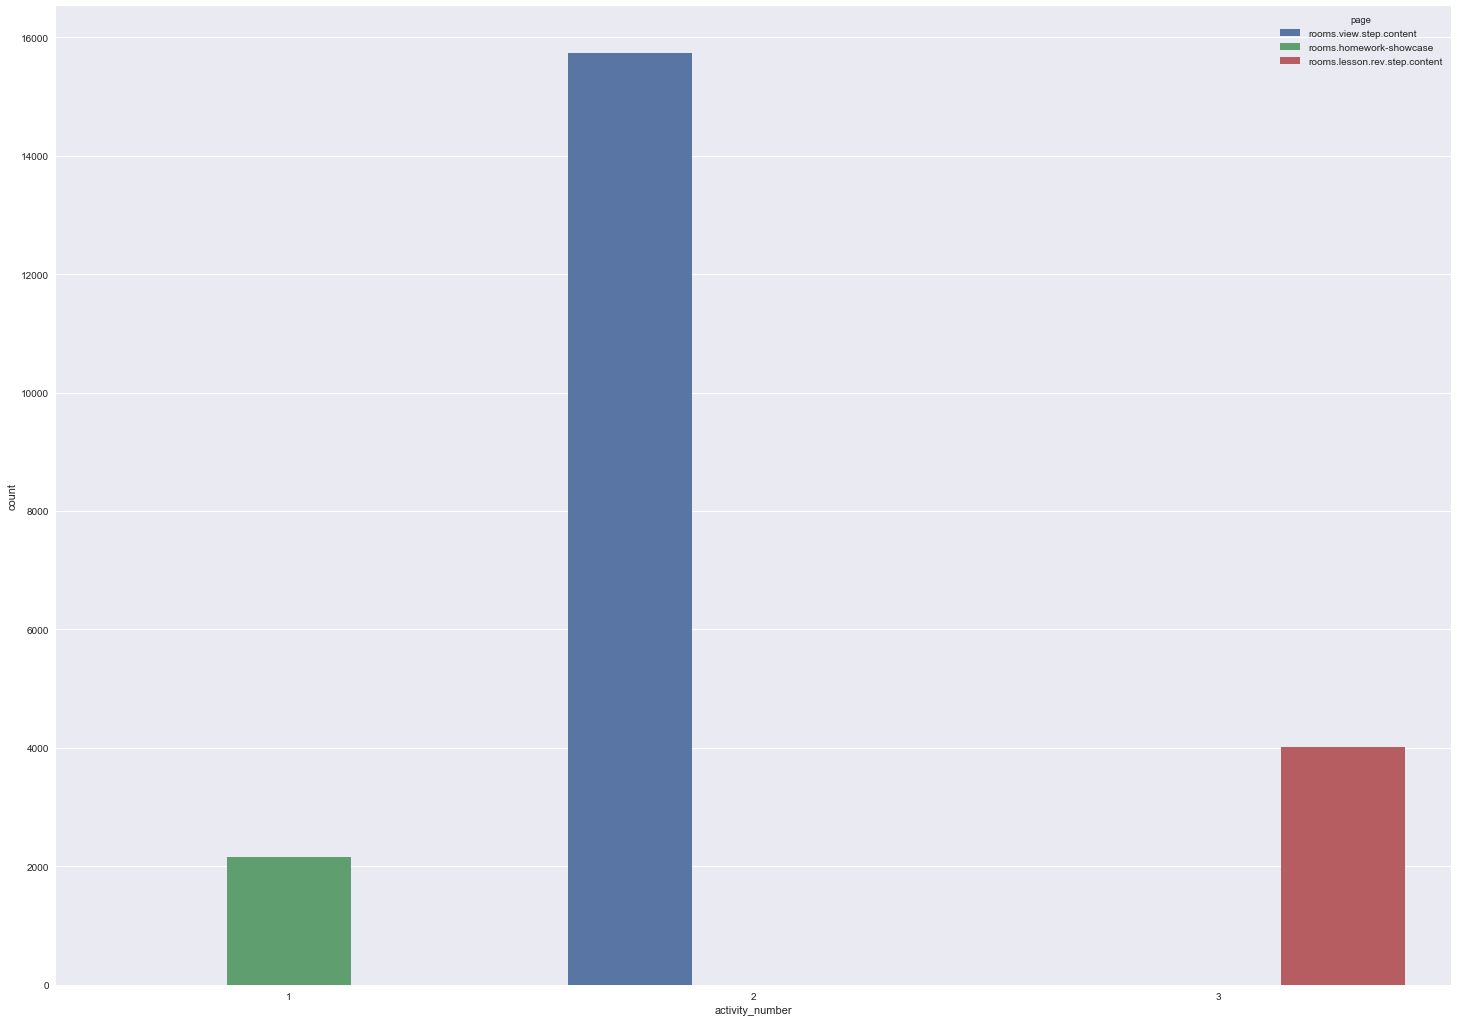

In [41]:
# Оценка принадлежности признака activity_number в выборке df_46_std

sns.countplot(x='activity_number', hue='page', data=df_46_std);

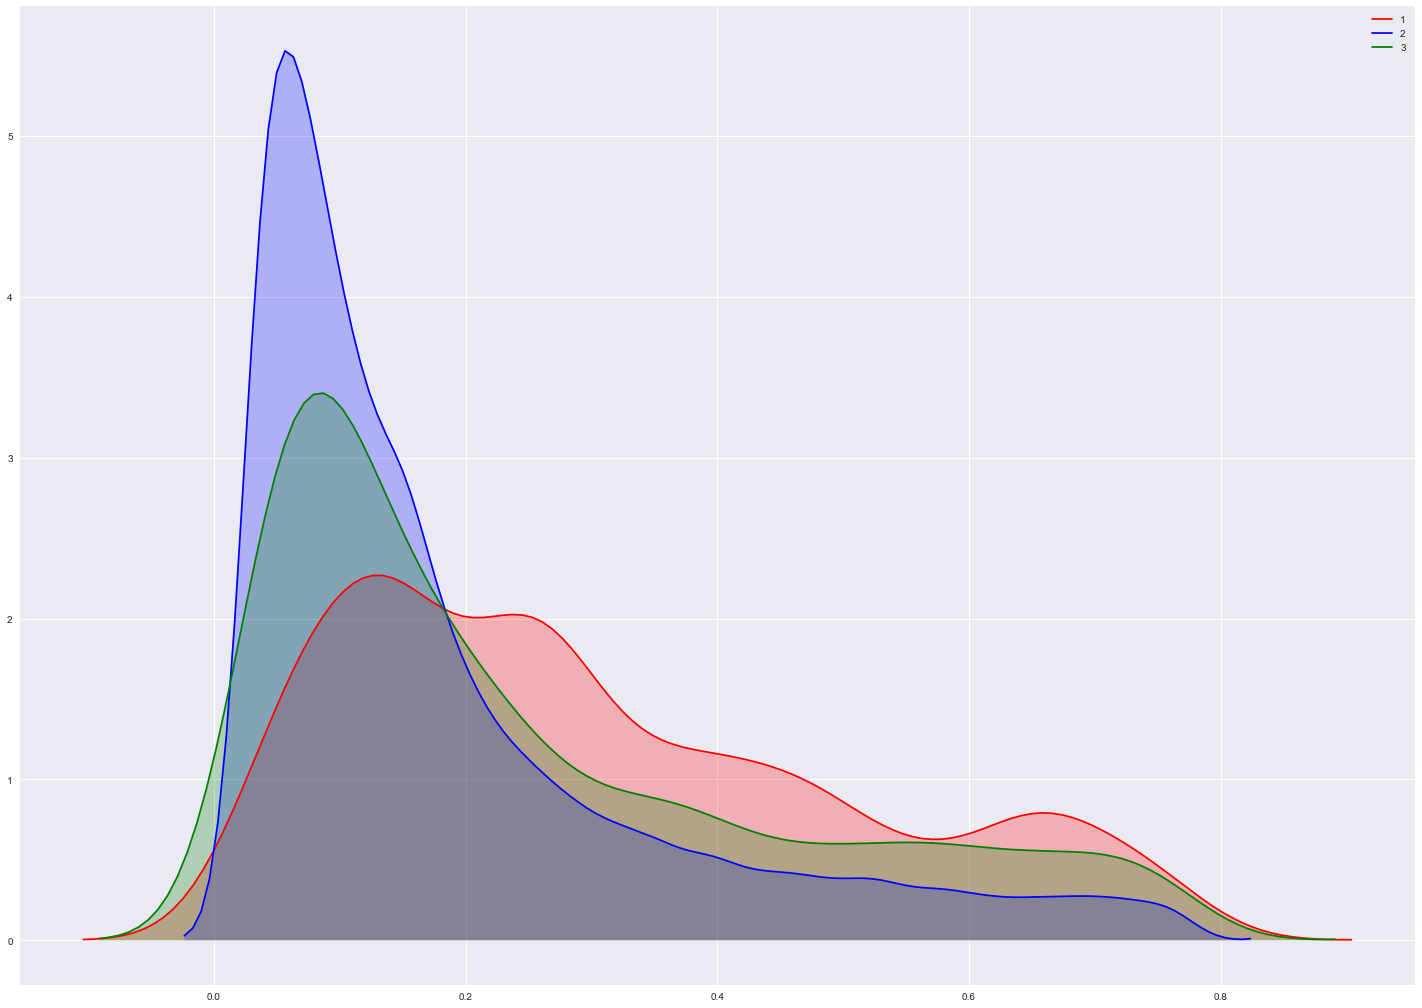

In [43]:
# Распределения времени активности учеников в выборке в выборке df_46_std по типу активности( 1.2.3)
sns.kdeplot(df_46_std['time_lag_min'][df_46_std.activity_number==1], shade=True, color="r", label='1')
sns.kdeplot(df_46_std['time_lag_min'][df_46_std.activity_number==2], shade=True, color="b", label='2')
sns.kdeplot(df_46_std['time_lag_min'][df_46_std.activity_number==3], shade=True, color="g", label='3')

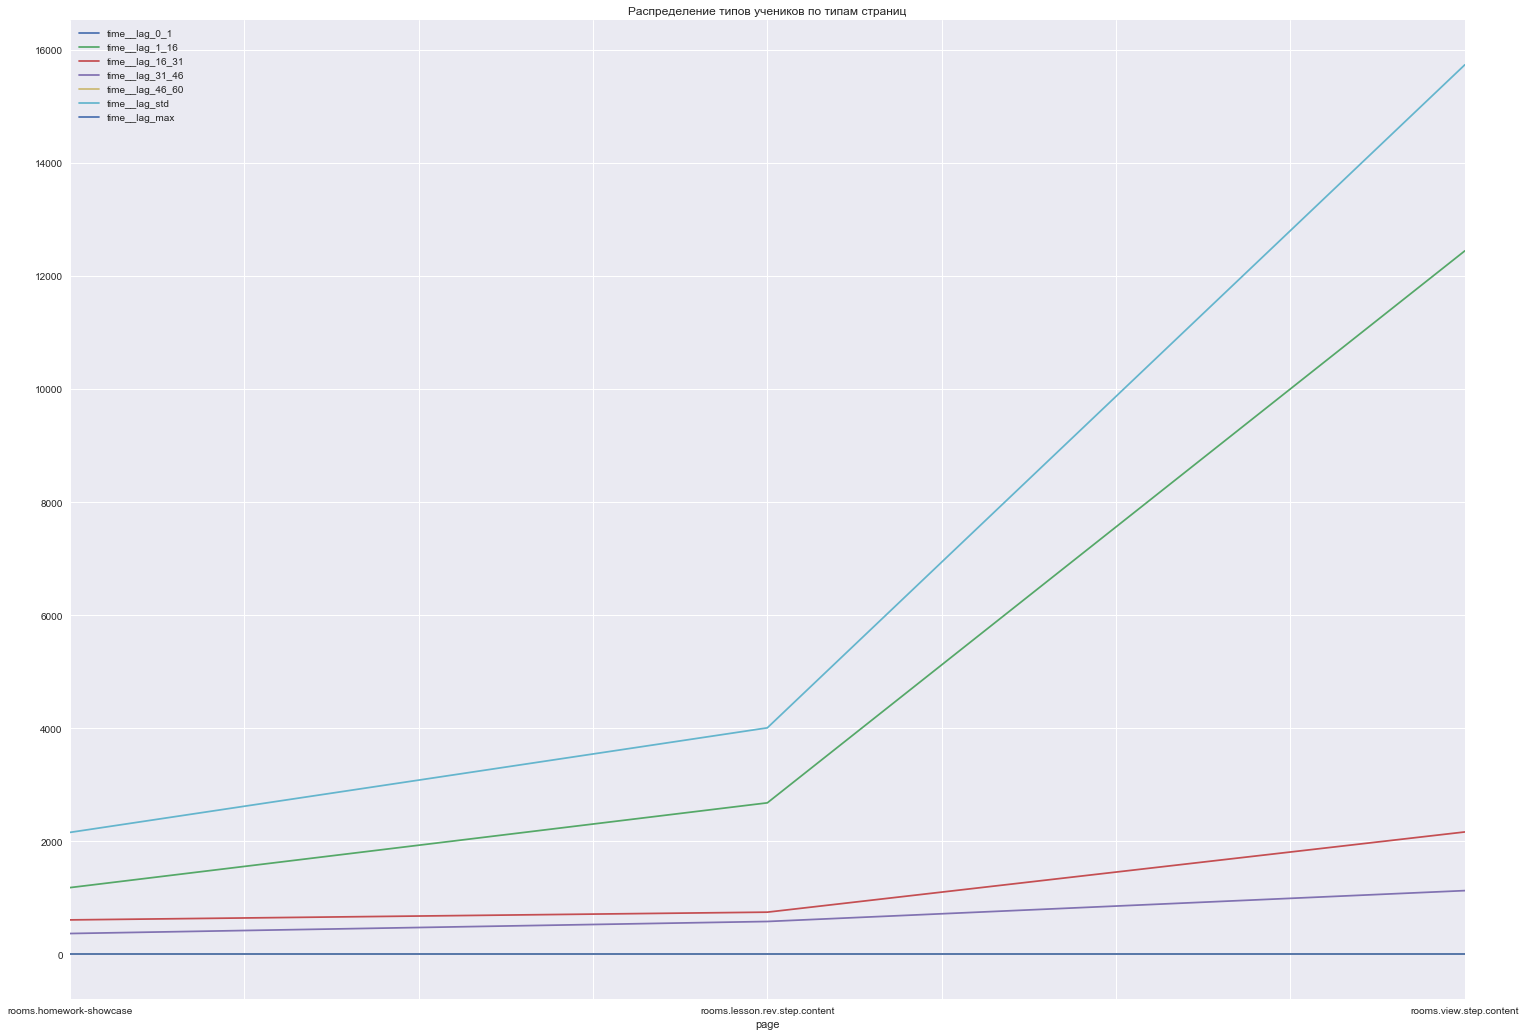

In [44]:
# Характер распределения типов учеников при проходам по страницам по времени в выборке df_46_std
# Как видно, по сравнению с предыдущим графиком - взаимосвзяанные кривые почти никуда не поехали. 

students_types_df_46_std = df_46_std[[x for x in df.columns if 'time__lag' in x] + ['page']]
students_types_df_46_std.groupby('page').sum().plot()
plt.legend()
plt.title('Распределение типов учеников по типам страниц');

In [45]:
# А теперь построим такиеже графики для выборки df_46_60 и df_60_max (60 и более минут)

df['time__lag_max']

df_46_60 = df.copy()
df_46_60 = df_46_60[df_46_60['time__lag_46_60'] ==1 ]
df_46_60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 11 to 55068
Data columns (total 13 columns):
user_id            1287 non-null int64
page               1287 non-null object
happened_at        1287 non-null object
activity_number    1287 non-null int64
time_lag           1287 non-null float64
time_lag_min       1287 non-null float64
time__lag_0_1      1287 non-null int32
time__lag_1_16     1287 non-null int32
time__lag_16_31    1287 non-null int32
time__lag_31_46    1287 non-null int32
time__lag_46_60    1287 non-null int32
time__lag_std      1287 non-null int32
time__lag_max      1287 non-null int32
dtypes: float64(2), int32(7), int64(2), object(2)
memory usage: 105.6+ KB


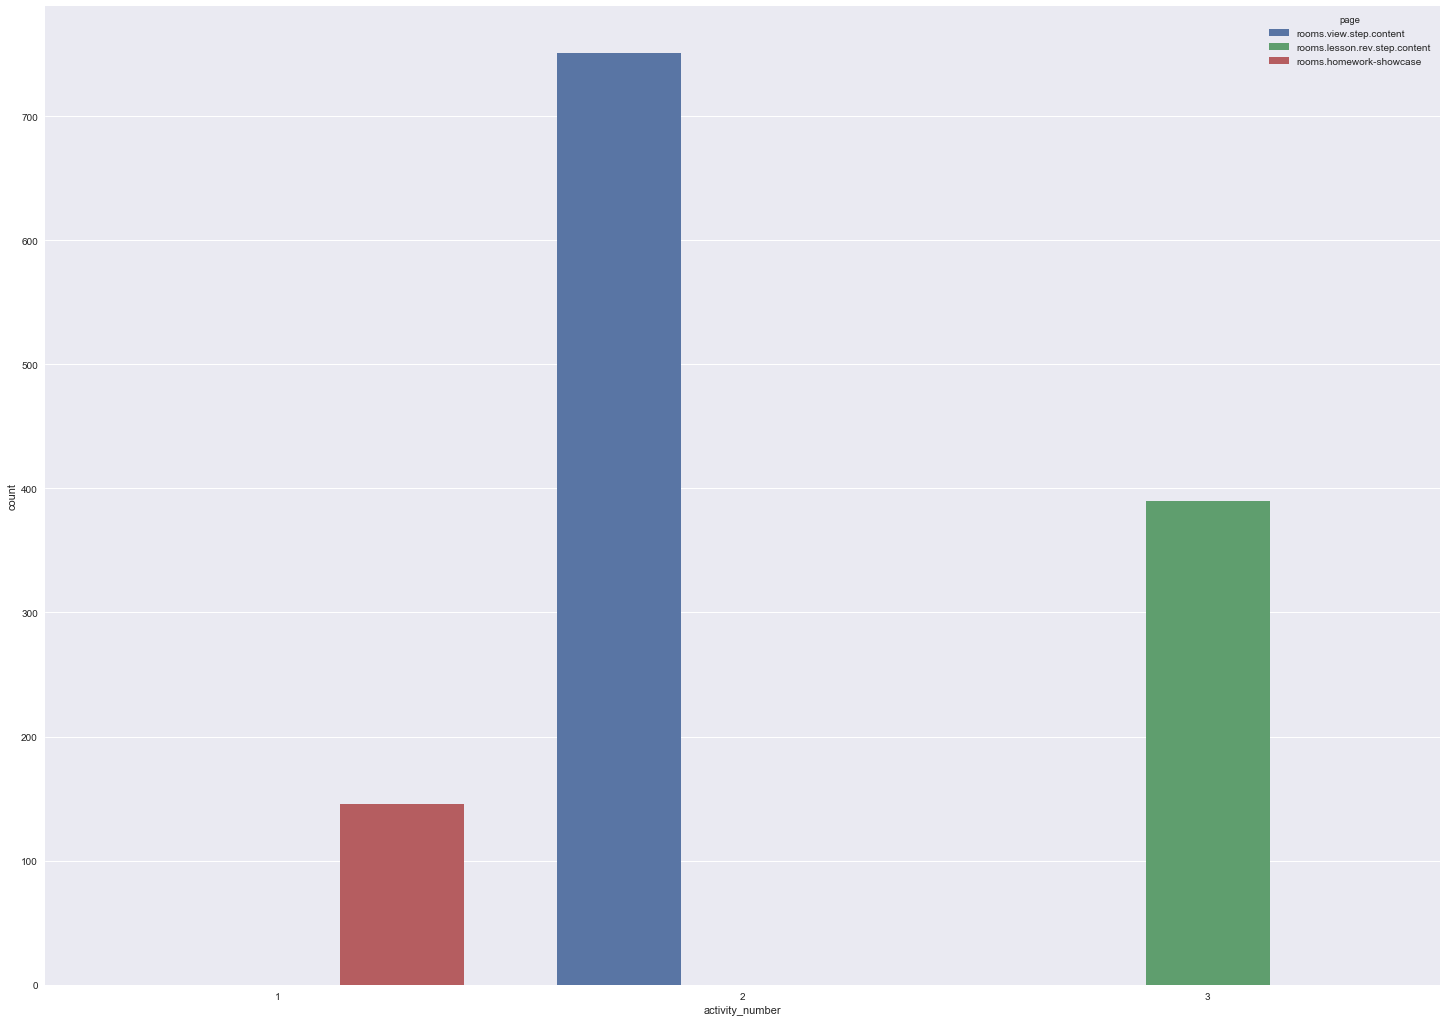

In [46]:
# Оценка принадлежности признака activity_number в выборке df_46_60 

sns.countplot(x='activity_number', hue='page', data=df_46_60);

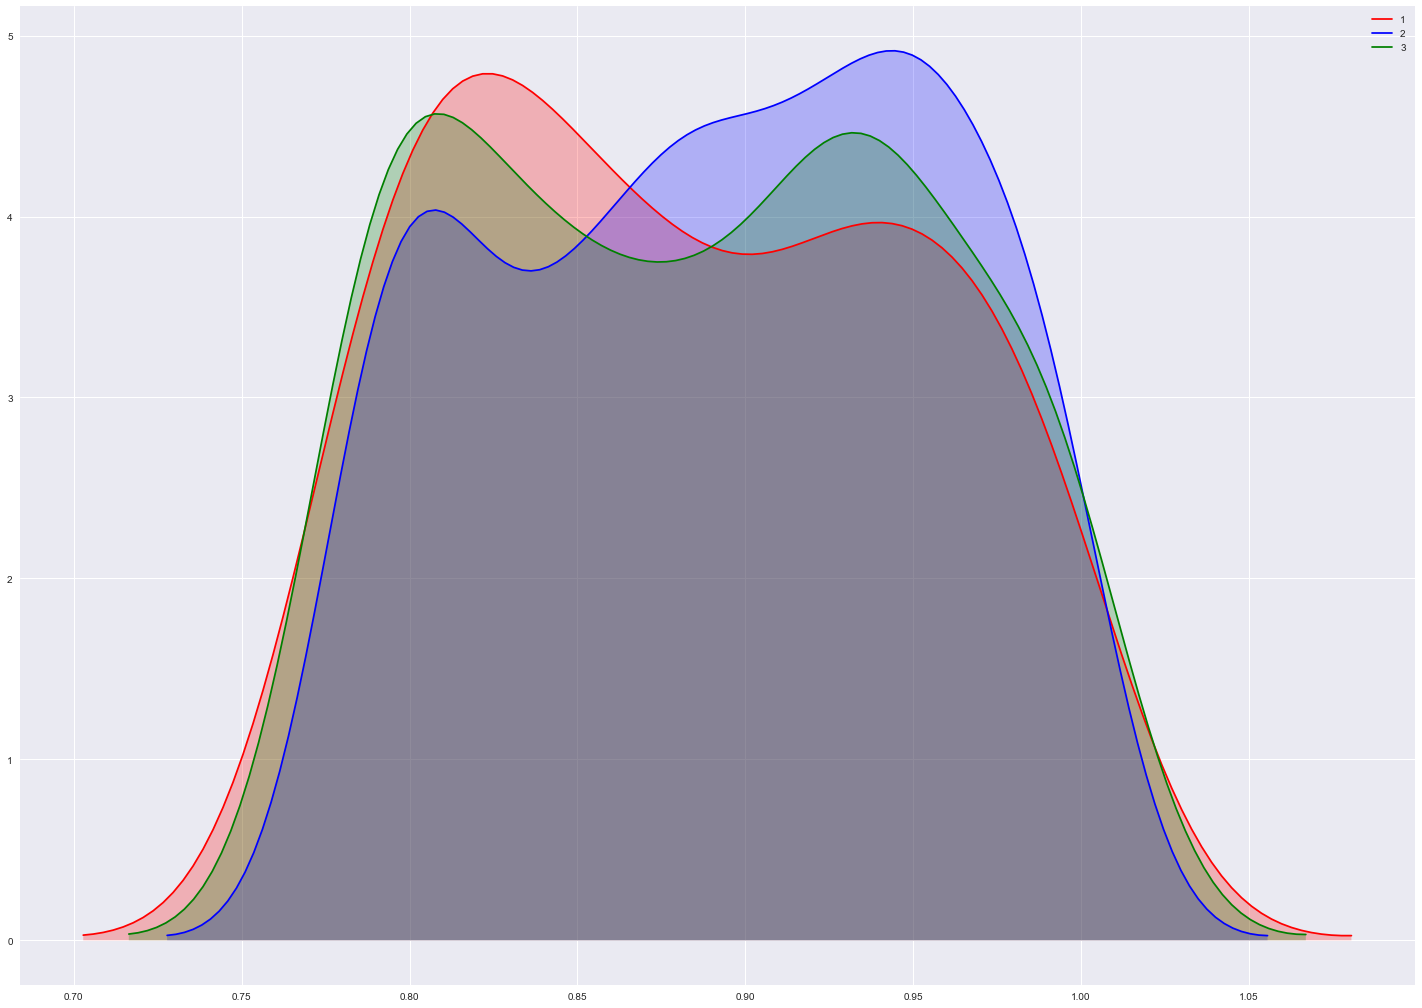

In [47]:
# Распределения времени активности учеников в выборке в выборке df_46_60 по типу активности( 1.2.3)
sns.kdeplot(df_46_60['time_lag_min'][df_46_60.activity_number==1], shade=True, color="r", label='1')
sns.kdeplot(df_46_60['time_lag_min'][df_46_60.activity_number==2], shade=True, color="b", label='2')
sns.kdeplot(df_46_60['time_lag_min'][df_46_60.activity_number==3], shade=True, color="g", label='3')

In [51]:
# Создадим соотвествующий объект
df_60_max = df.copy()
df_60_max = df_60_max[df_60_max['time__lag_max'] ==1 ]
df_60_max.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21219 entries, 9 to 55076
Data columns (total 13 columns):
user_id            21219 non-null int64
page               21219 non-null object
happened_at        21219 non-null object
activity_number    21219 non-null int64
time_lag           21219 non-null float64
time_lag_min       21219 non-null float64
time__lag_0_1      21219 non-null int32
time__lag_1_16     21219 non-null int32
time__lag_16_31    21219 non-null int32
time__lag_31_46    21219 non-null int32
time__lag_46_60    21219 non-null int32
time__lag_std      21219 non-null int32
time__lag_max      21219 non-null int32
dtypes: float64(2), int32(7), int64(2), object(2)
memory usage: 1.7+ MB


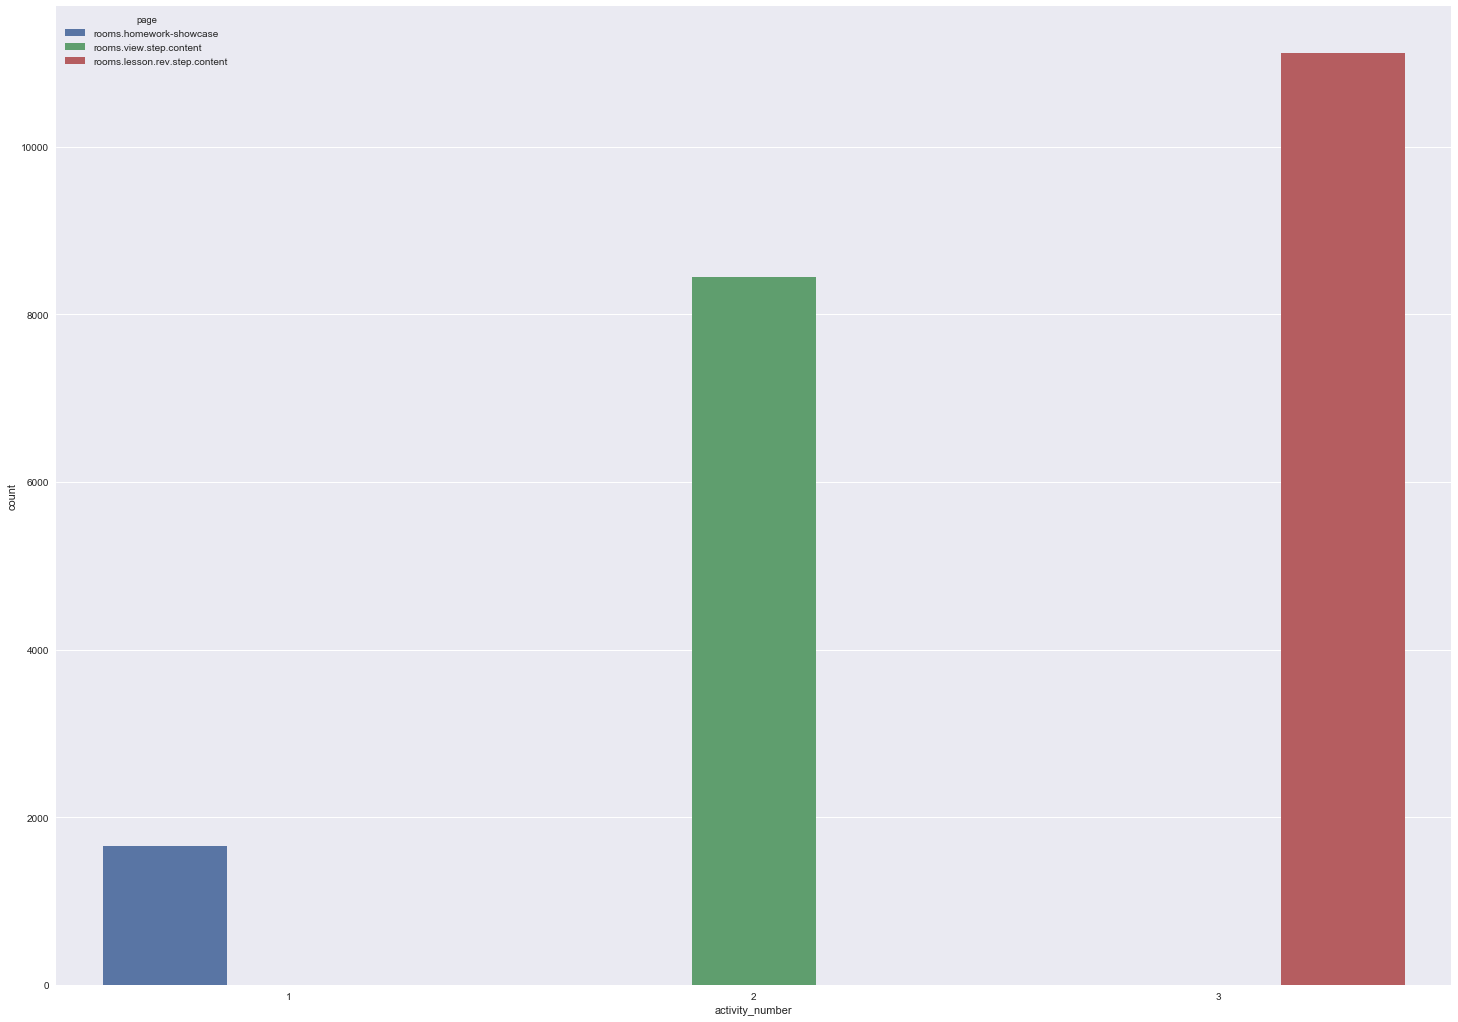

In [52]:
# Оценка принадлежности признака activity_number в выборке df_60_max 

sns.countplot(x='activity_number', hue='page', data=df_60_max);

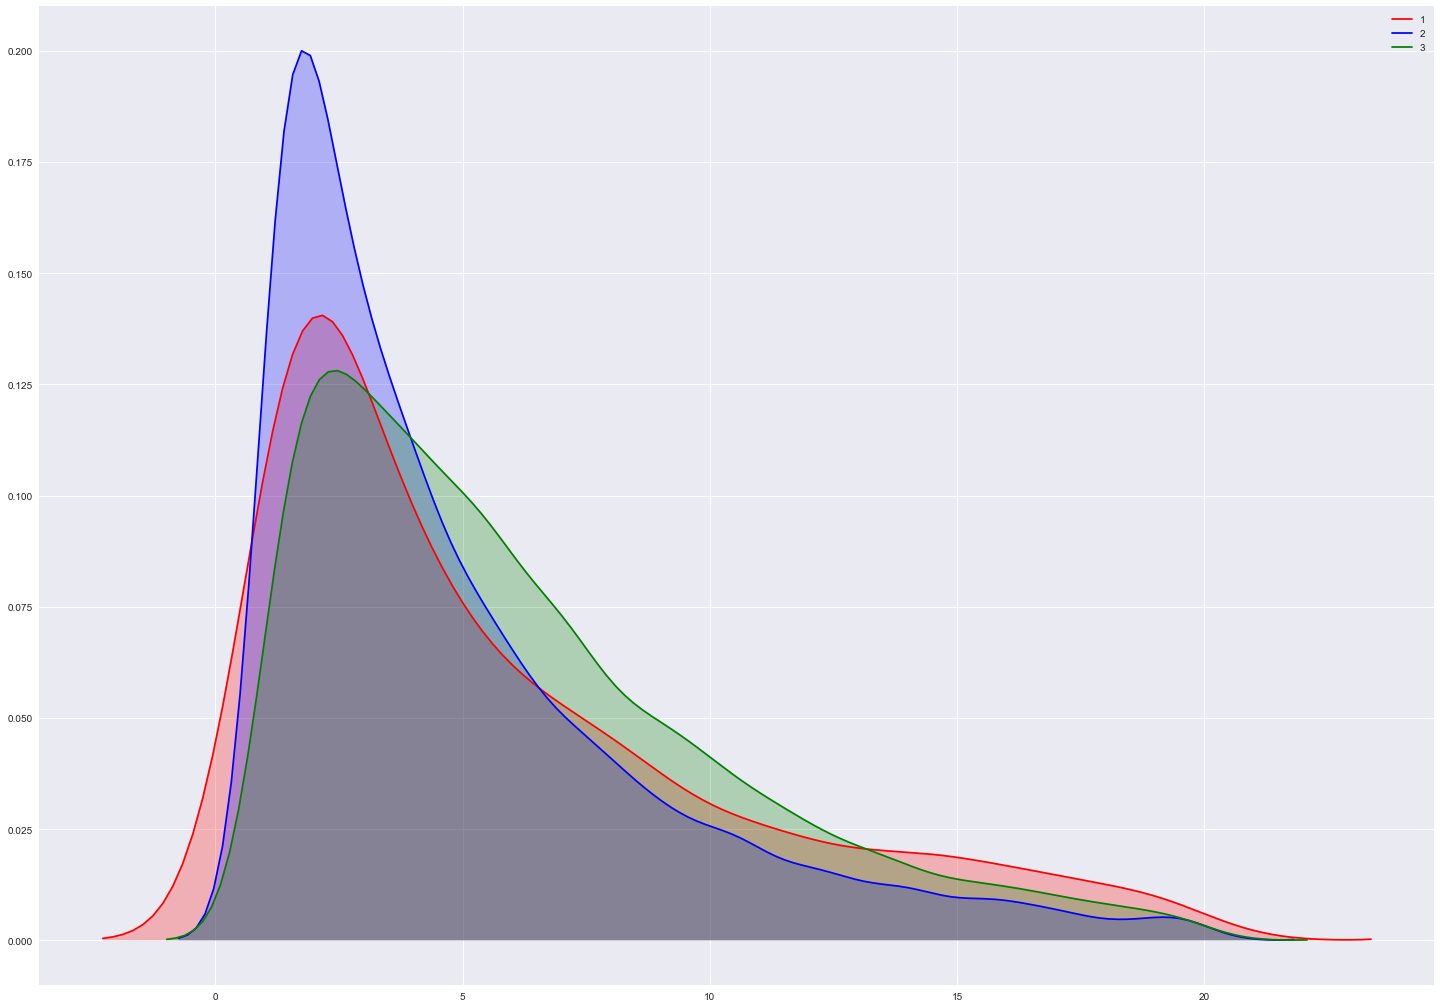

In [53]:
# Распределения времени активности учеников в выборке в выборке df_60_max по типу активности( 1.2.3)
sns.kdeplot(df_60_max['time_lag_min'][df_60_max.activity_number==1], shade=True, color="r", label='1')
sns.kdeplot(df_60_max['time_lag_min'][df_60_max.activity_number==2], shade=True, color="b", label='2')
sns.kdeplot(df_60_max['time_lag_min'][df_60_max.activity_number==3], shade=True, color="g", label='3')

In [56]:
# Как можно заменитить на графиках - тип активность юзер изменился, хотя в случае df_46_60 изменения не так незначительны.
# df_46_60 можно отнести к случаю несглаженных краёв при оценке временных рядов, тогда как df_60_max - явный мусор.
# На последок я бы хотел рассмотреть ещё один объект - df_0_1 - выбросы длительностью менее минуты.
# Выбросы - есть выбросы, но посмотреть где они происходят - стоит.
df_0_1 = df.copy()
df_0_1 = df_0_1[df_0_1['time__lag_0_1'] ==1 ]
df_0_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2274 entries, 13 to 55026
Data columns (total 13 columns):
user_id            2274 non-null int64
page               2274 non-null object
happened_at        2274 non-null object
activity_number    2274 non-null int64
time_lag           2274 non-null float64
time_lag_min       2274 non-null float64
time__lag_0_1      2274 non-null int32
time__lag_1_16     2274 non-null int32
time__lag_16_31    2274 non-null int32
time__lag_31_46    2274 non-null int32
time__lag_46_60    2274 non-null int32
time__lag_std      2274 non-null int32
time__lag_max      2274 non-null int32
dtypes: float64(2), int32(7), int64(2), object(2)
memory usage: 186.5+ KB


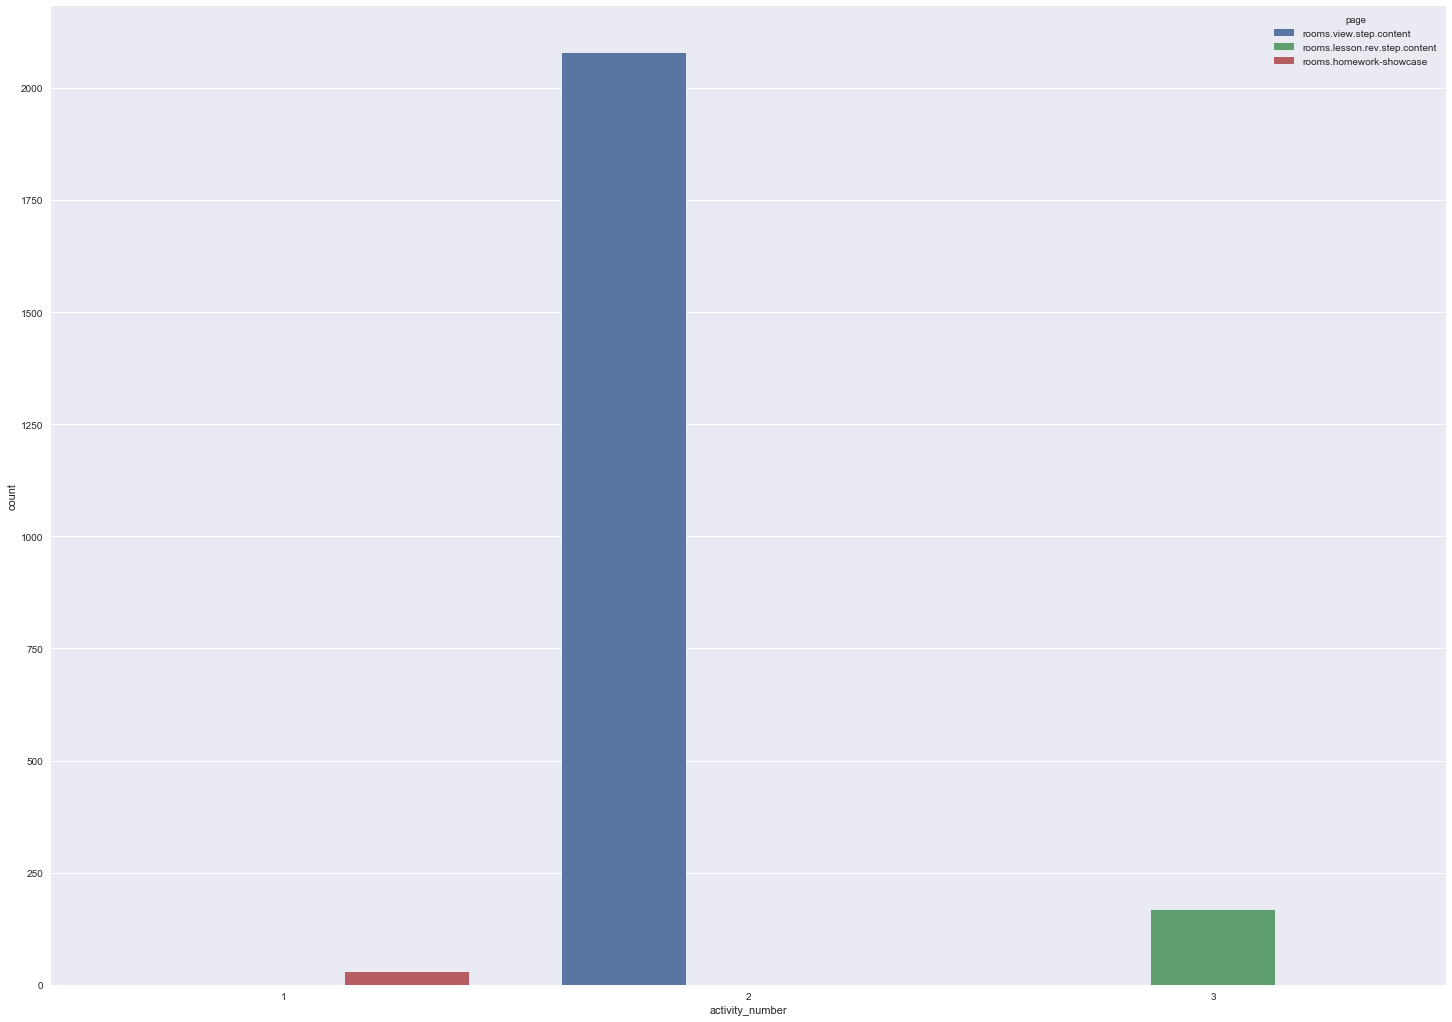

In [57]:
# Оценка принадлежности признака activity_number в выборке df_0_1 
# Хаотичная активность учеников сводиться к странице со списокм заданий.
sns.countplot(x='activity_number', hue='page', data=df_0_1);

In [62]:
# Можно попробовать отследить как меняеться этак активность, разбив выборку на известные группы.
# Группа минимальной активности: 1-16 минут.
df_1_16 = df.copy()
df_1_16 = df_1_16[df_1_16['time__lag_1_16'] ==1 ]
df_1_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16306 entries, 1 to 55074
Data columns (total 13 columns):
user_id            16306 non-null int64
page               16306 non-null object
happened_at        16306 non-null object
activity_number    16306 non-null int64
time_lag           16306 non-null float64
time_lag_min       16306 non-null float64
time__lag_0_1      16306 non-null int32
time__lag_1_16     16306 non-null int32
time__lag_16_31    16306 non-null int32
time__lag_31_46    16306 non-null int32
time__lag_46_60    16306 non-null int32
time__lag_std      16306 non-null int32
time__lag_max      16306 non-null int32
dtypes: float64(2), int32(7), int64(2), object(2)
memory usage: 1.3+ MB


In [63]:
# Статистика группы
for c in df_1_16.columns:
    n = df_1_16[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(df_1_16[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

user_id
2200
----------
page
3 [('rooms.homework-showcase', 1180), ('rooms.lesson.rev.step.content', 2680), ('rooms.view.step.content', 12446)]
----------
happened_at
16301
----------
activity_number
3 [(1, 1180), (2, 12446), (3, 2680)]
----------
time_lag
15
----------
time_lag_min
15
----------
time__lag_0_1
1 [(0, 16306)]
----------
time__lag_1_16
1 [(1, 16306)]
----------
time__lag_16_31
1 [(0, 16306)]
----------
time__lag_31_46
1 [(0, 16306)]
----------
time__lag_46_60
1 [(0, 16306)]
----------
time__lag_std
1 [(1, 16306)]
----------
time__lag_max
1 [(0, 16306)]
----------


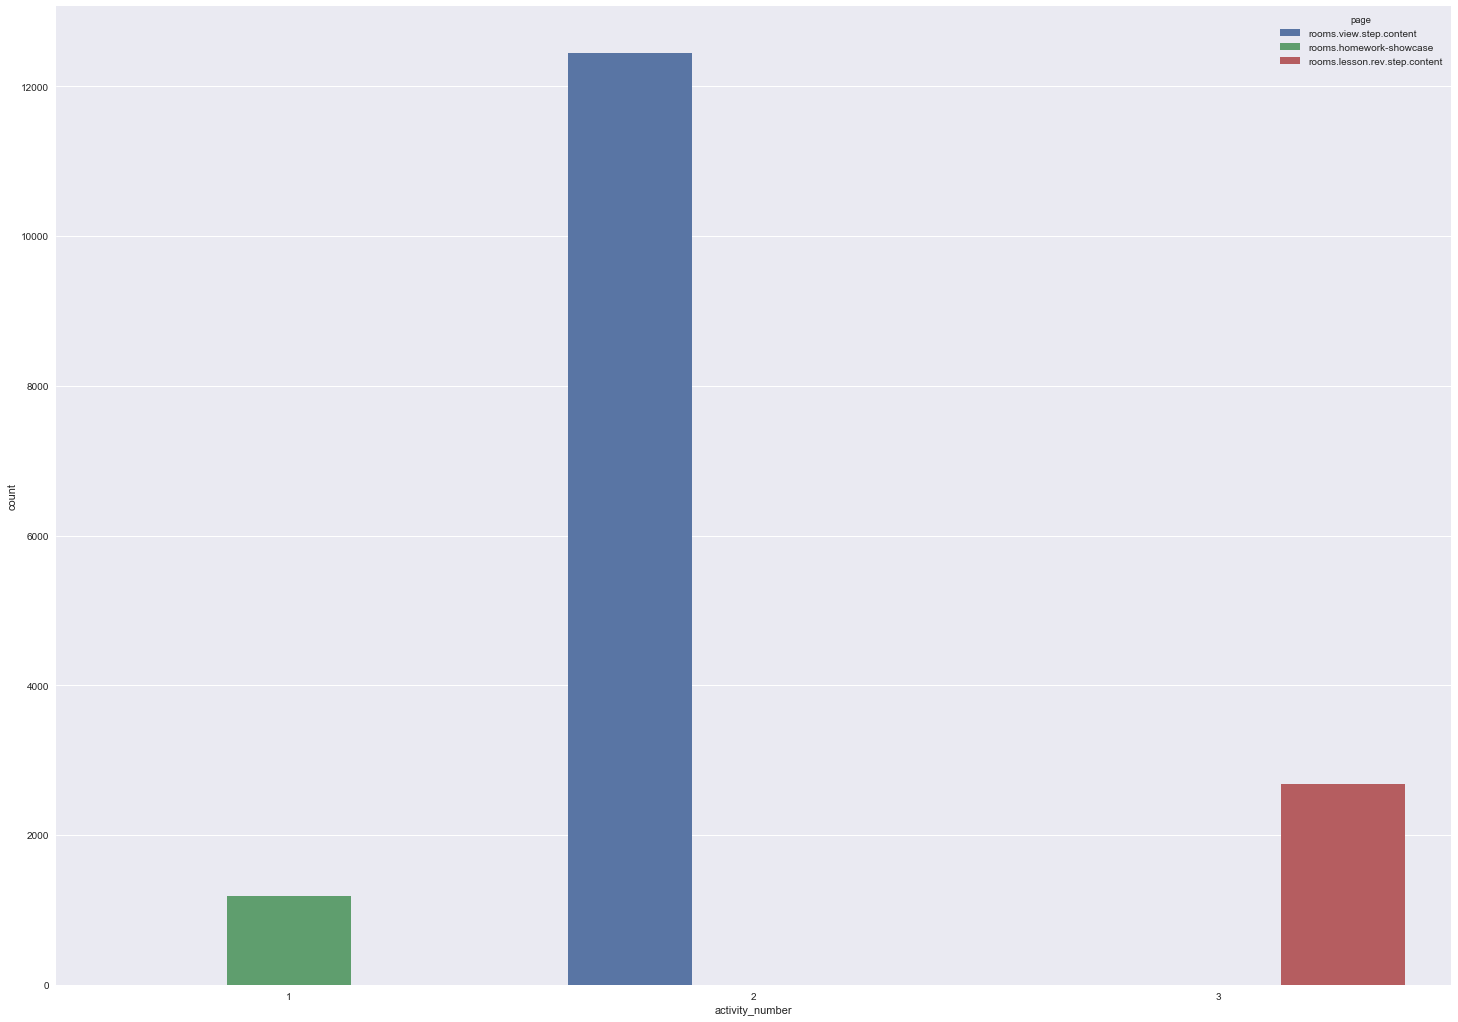

In [64]:
# Оценка принадлежности признака activity_number в выборке df_1_16 
# Наблюдаем прирост активности на страница урока с преподавателем.
sns.countplot(x='activity_number', hue='page', data=df_1_16);

In [65]:
# Группа средней активности: 16-31 минута.
df_16_31 = df.copy()
df_16_31 = df_16_31[df_16_31['time__lag_16_31'] ==1 ]
df_16_31.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3520 entries, 20 to 55052
Data columns (total 13 columns):
user_id            3520 non-null int64
page               3520 non-null object
happened_at        3520 non-null object
activity_number    3520 non-null int64
time_lag           3520 non-null float64
time_lag_min       3520 non-null float64
time__lag_0_1      3520 non-null int32
time__lag_1_16     3520 non-null int32
time__lag_16_31    3520 non-null int32
time__lag_31_46    3520 non-null int32
time__lag_46_60    3520 non-null int32
time__lag_std      3520 non-null int32
time__lag_max      3520 non-null int32
dtypes: float64(2), int32(7), int64(2), object(2)
memory usage: 288.8+ KB


In [66]:
# Статистика группы
for c in df_16_31.columns:
    n = df_16_31[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(df_16_31[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

user_id
1432
----------
page
3 [('rooms.homework-showcase', 609), ('rooms.lesson.rev.step.content', 746), ('rooms.view.step.content', 2165)]
----------
happened_at
3520
----------
activity_number
3 [(1, 609), (2, 2165), (3, 746)]
----------
time_lag
15
----------
time_lag_min
15
----------
time__lag_0_1
1 [(0, 3520)]
----------
time__lag_1_16
1 [(0, 3520)]
----------
time__lag_16_31
1 [(1, 3520)]
----------
time__lag_31_46
1 [(0, 3520)]
----------
time__lag_46_60
1 [(0, 3520)]
----------
time__lag_std
1 [(1, 3520)]
----------
time__lag_max
1 [(0, 3520)]
----------


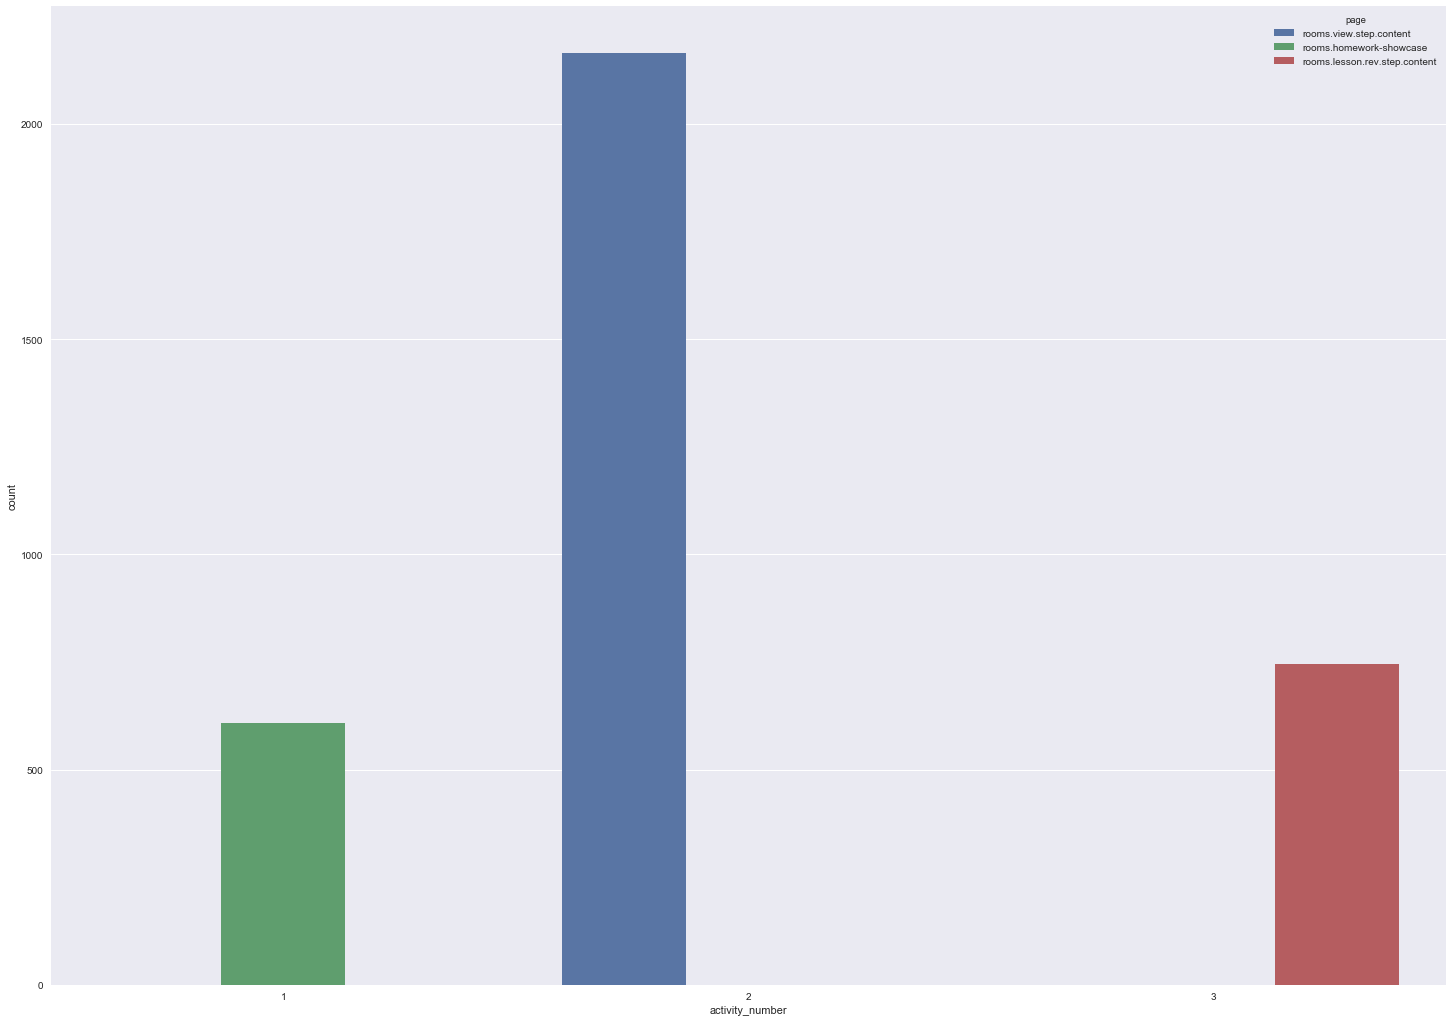

In [67]:
# Оценка принадлежности признака activity_number в выборке df_16_31 
# Эта группа наоборот - более самостоятельная, чем предыдущие.
sns.countplot(x='activity_number', hue='page', data=df_16_31);

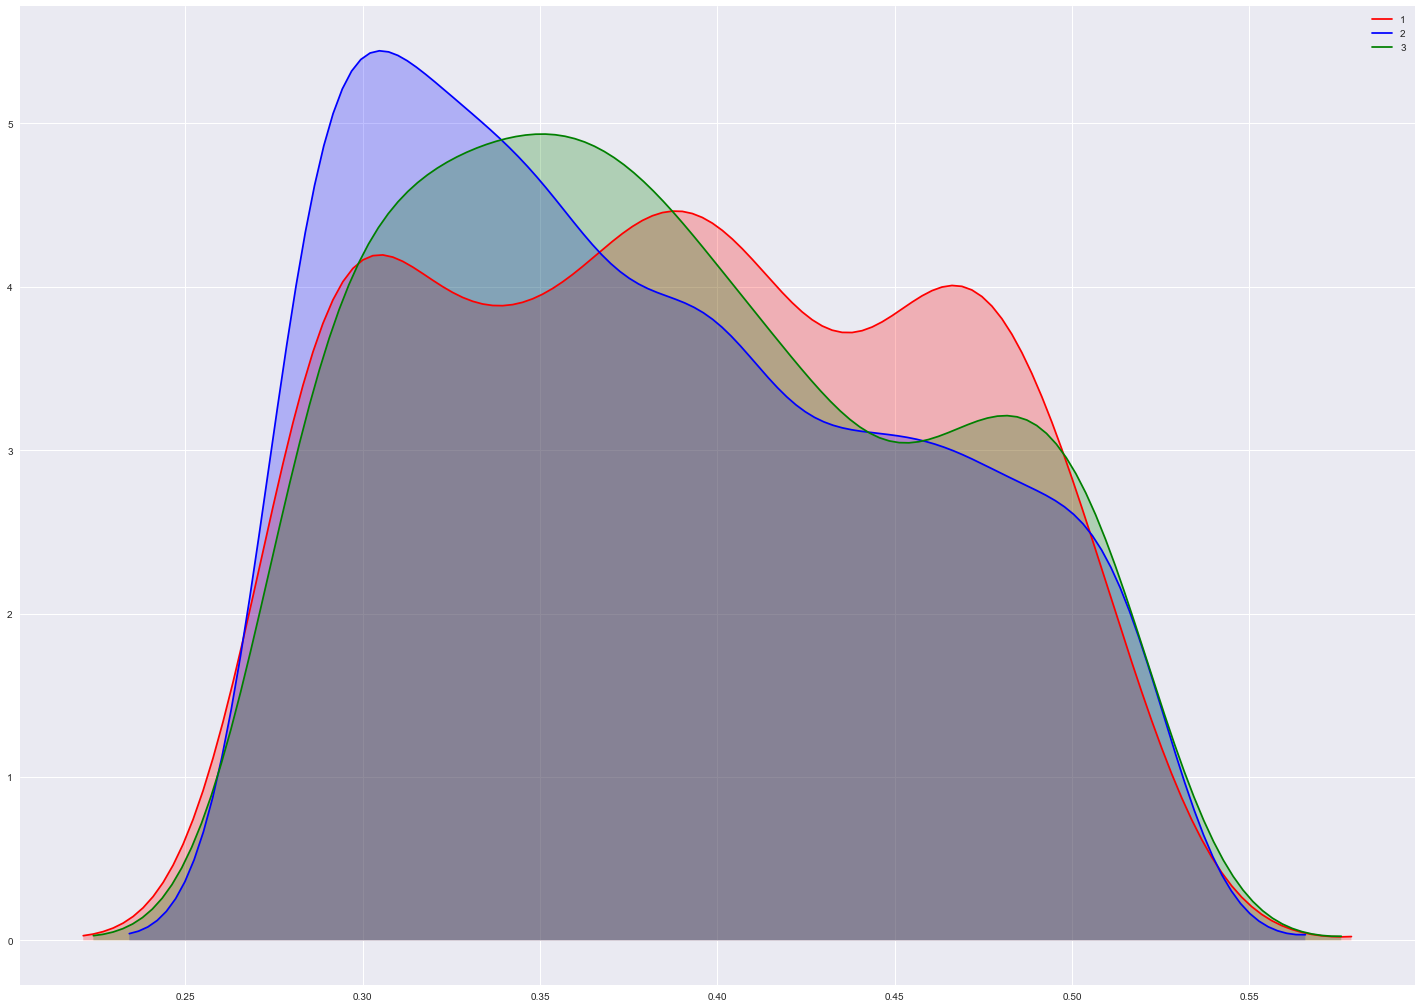

In [68]:
# При этом активность по времени чем то напоминает активность оптимальной группы.
sns.kdeplot(df_16_31['time_lag_min'][df_16_31.activity_number==1], shade=True, color="r", label='1')
sns.kdeplot(df_16_31['time_lag_min'][df_16_31.activity_number==2], shade=True, color="b", label='2')
sns.kdeplot(df_16_31['time_lag_min'][df_16_31.activity_number==3], shade=True, color="g", label='3')

In [69]:
# Посмотрим последнюю группу: df_31_46
df_31_46 = df.copy()
df_31_46 = df_31_46[df_31_46['time__lag_31_46'] ==1 ]
df_31_46.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 4 to 55063
Data columns (total 13 columns):
user_id            2076 non-null int64
page               2076 non-null object
happened_at        2076 non-null object
activity_number    2076 non-null int64
time_lag           2076 non-null float64
time_lag_min       2076 non-null float64
time__lag_0_1      2076 non-null int32
time__lag_1_16     2076 non-null int32
time__lag_16_31    2076 non-null int32
time__lag_31_46    2076 non-null int32
time__lag_46_60    2076 non-null int32
time__lag_std      2076 non-null int32
time__lag_max      2076 non-null int32
dtypes: float64(2), int32(7), int64(2), object(2)
memory usage: 170.3+ KB


In [70]:
# Статистика группы
for c in df_31_46.columns:
    n = df_31_46[c].nunique()
    print(c)
    
    if n <= 3:
        print(n, sorted(df_31_46[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

user_id
1050
----------
page
3 [('rooms.homework-showcase', 368), ('rooms.lesson.rev.step.content', 581), ('rooms.view.step.content', 1127)]
----------
happened_at
2076
----------
activity_number
3 [(1, 368), (2, 1127), (3, 581)]
----------
time_lag
15
----------
time_lag_min
15
----------
time__lag_0_1
1 [(0, 2076)]
----------
time__lag_1_16
1 [(0, 2076)]
----------
time__lag_16_31
1 [(0, 2076)]
----------
time__lag_31_46
1 [(1, 2076)]
----------
time__lag_46_60
1 [(0, 2076)]
----------
time__lag_std
1 [(1, 2076)]
----------
time__lag_max
1 [(0, 2076)]
----------


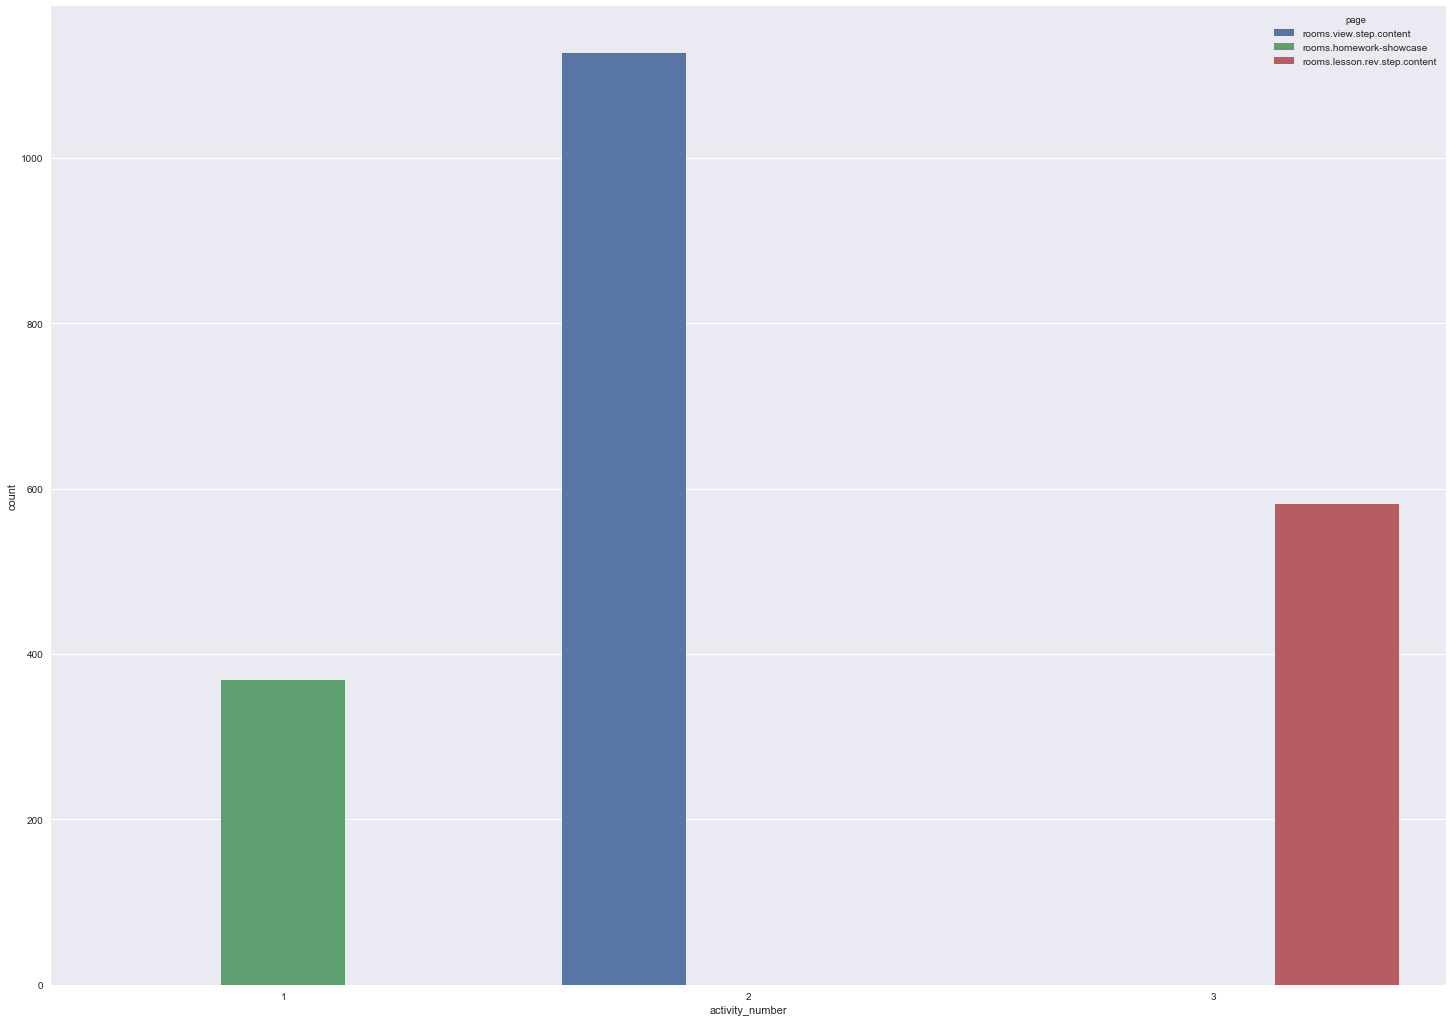

In [71]:
# Оценка принадлежности признака activity_number в выборке df_16_31 
# Эта группа наоборот - более самостоятельная, чем предыдущие.
sns.countplot(x='activity_number', hue='page', data=df_31_46);

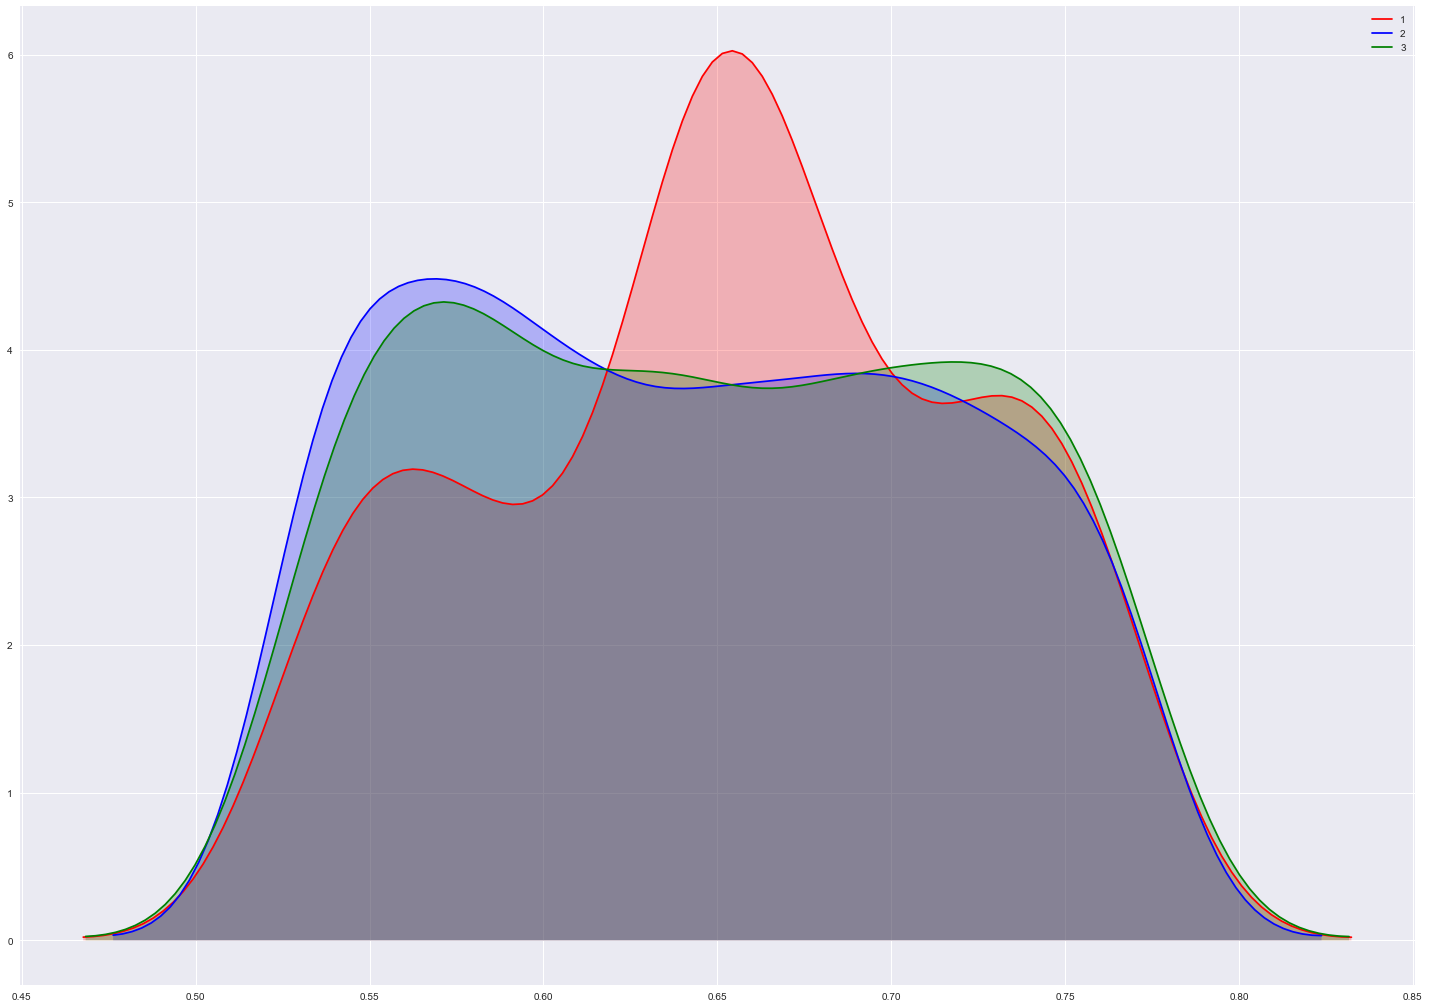

In [72]:
# Здесь уже что-то неявное, этот выброс надо глубоко копать - а я спать хочу. Поэтому подведём итоги.
sns.kdeplot(df_31_46['time_lag_min'][df_31_46.activity_number==1], shade=True, color="r", label='1')
sns.kdeplot(df_31_46['time_lag_min'][df_31_46.activity_number==2], shade=True, color="b", label='2')
sns.kdeplot(df_31_46['time_lag_min'][df_31_46.activity_number==3], shade=True, color="g", label='3')

In [ ]:
# В первой группе было 2200, во второй 1432, в третей 1050 ученика. Медиана в 46 минут формируеться неявным большинством.